<a href="https://colab.research.google.com/github/mohamed49/NTI-AI/blob/main/ECG_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linking Dataset from Kaggle

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [4]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
unzip:  cannot find or open africa-cup-of-nations-squads-list.zip, africa-cup-of-nations-squads-list.zip.zip or africa-cup-of-nations-squads-list.zip.ZIP.


In [5]:
! mkdir datasets
! unzip "heartbeat.zip" -d datasets

mkdir: cannot create directory ‘datasets’: File exists
Archive:  heartbeat.zip
  inflating: datasets/mitbih_test.csv  
  inflating: datasets/mitbih_train.csv  
  inflating: datasets/ptbdb_abnormal.csv  
  inflating: datasets/ptbdb_normal.csv  


#Load Dependencies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#Data Preprocessing

In [13]:
train_data = pd.read_csv('datasets/mitbih_train.csv', header=None)
test_data = pd.read_csv('datasets/mitbih_test.csv', header=None)

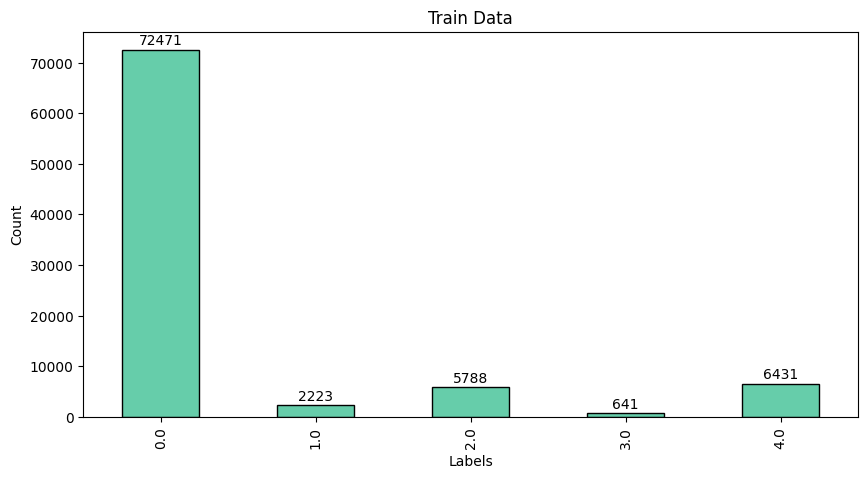

In [17]:
plt.figure(figsize=(10, 5))
train_class_counts = train_data[187].value_counts()
train_class_counts.sort_index(inplace=True)
train_class_counts.plot(kind='bar', color='#66CDAA', edgecolor='black')
plt.title('Train Data')
plt.xlabel('Labels')
plt.ylabel('Count')
for idx, count in enumerate(train_class_counts):
    plt.text(idx, count + 500, str(count), ha='center', va='bottom', fontsize=10)
plt.show()

#Initialize Models

In [ ]:
models = {
    "Logistic Regression": RandomForestClassifier(random_state=42),
    "SVM": LinearSVC(random_state=42, max_iter=10000),
    "KNN": SVC(random_state=42),
    "Decision Tree": XGBClassifier(random_state=42, eval_metric='mlogloss')
}

In [ ]:
results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(train_data_features, train_data_labels)  # Train the model

    y_pred = model.predict(test_data_features)  # Predict on test data

    # Evaluate model performance
    acc = accuracy_score(test_data_labels, y_pred)
    f1 = f1_score(test_data_labels, y_pred, average='weighted')
    precision = precision_score(test_data_labels, y_pred, average='weighted')
    recall = recall_score(test_data_labels, y_pred, average='weighted')

    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)